In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df=df[["text","airline_sentiment"]]

In [6]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [7]:
df.shape

(14640, 2)

In [8]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:
df.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [10]:
df.airline_sentiment.value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
data=df["airline_sentiment"]

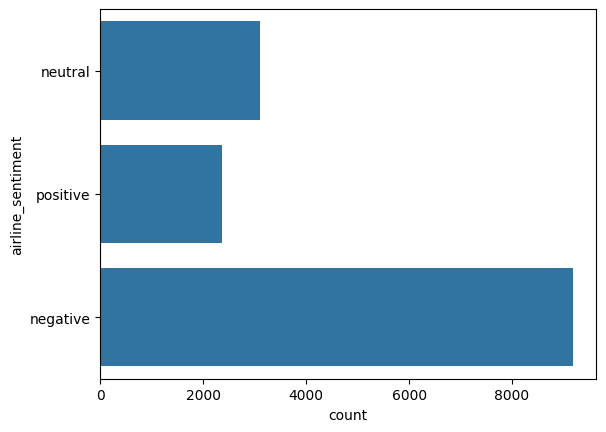

In [13]:
ax=sns.countplot(data)
plt.show()

In [14]:
LABELS=df.airline_sentiment.unique()

In [15]:
label_dict={}
for index,LABEL in enumerate(LABELS):
    label_dict[LABEL]=index

In [16]:
label_dict

{'neutral': 0, 'positive': 1, 'negative': 2}

In [17]:
df["airline_sentiment"]=df["airline_sentiment"].map(label_dict)

In [18]:
X=df.index.values
Y=df.airline_sentiment.values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=100,
                                            stratify=df.airline_sentiment.values)

In [21]:
X_train.shape

(11712,)

In [22]:
X_val.shape

(2928,)

In [23]:
df["data_type"]=["not_set"]*df.shape[0]

In [24]:
df.head()

,text,airline_sentiment,data_type
0,@VirginAmerica What @dhepburn said.,0,not_set
1,@VirginAmerica plus you've added commercials t...,1,not_set
2,@VirginAmerica I didn't today... Must mean I n...,0,not_set
3,@VirginAmerica it's really aggressive to blast...,2,not_set
4,@VirginAmerica and it's a really big bad thing...,2,not_set


In [25]:
df.loc[X_train,"data_type"]="train"
print(X_train)

[11740  5015 13952 ... 14507   426 11677]


In [26]:
df.loc[X_val,"data_type"]="val"
print(X_val)

[11488 12003  7586 ...  9410  5291  3717]


In [27]:
df.groupby(["airline_sentiment","data_type"]).count()

text
airline_sentiment data_type      
0                 train      2479
                  val         620
1                 train      1890
                  val         473
2                 train      7343
                  val        1835

# BERT Tokenizer setting

###### Both BERT-base and BERT-large models are trained on a large amount of data set and this training is done based on two processes, The first one is Masked Language Model and other is Next sentence prediction model. So by default the model expects two sequences(sentences) of inputs, In tasks like question and answering first sequence is passage and second one is question but here in our case it is a classification task and we have only one sequence as input. We need to provide an additional attention mask to tell the model that we have only one sequence of input. In case of training BERT model for sentiment analysis(Classification), the model expects two inputs: token ids and attention mask.

In [28]:
from transformers import BertTokenizer

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [29]:
tokenizer=BertTokenizer.from_pretrained("bert-base-uncased")

In [30]:
max_length=df["text"].str.len().max()
max_length

186

###### 186 character not word

# Distplot

###### A histogram is a graphical representation of the distribution of a dataset. It consists of bars, where each bar represents an interval (or bin) along the horizontal axis, and the height of the bar represents the frequency (or count) of data points falling within that interval.

/tmp/ipykernel_65298/311070743.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=7, kde=False, color='blue', hist_kws=dict(edgecolor="Black", linewidth=1))


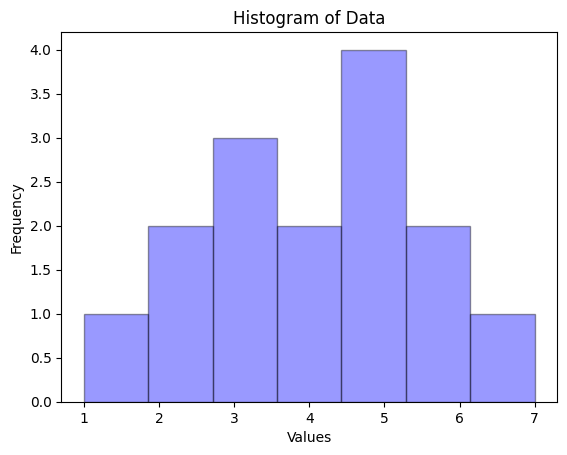

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7]

# Creating a histogram using seaborn
sns.distplot(data, bins=7, kde=False, color='blue', hist_kws=dict(edgecolor="Black", linewidth=1))
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display the plot
plt.show()


# Distribution plot for Max Length

In [32]:
Max_Len=np.array([len(x.split()) for x in df.text])

In [33]:
Max_Len

array([ 4,  9, 12, ...,  7, 23, 30])

###### Calculated Words

/tmp/ipykernel_65298/595336695.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Max_Len)


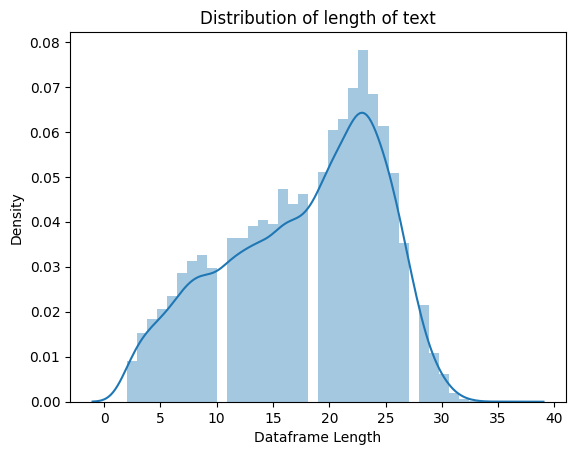

In [34]:
sns.distplot(Max_Len)
plt.title("Distribution of length of text")
plt.xlabel("Dataframe Length")
plt.show()

In [35]:
encoded_train_text=tokenizer.batch_encode_plus(df[df["data_type"]=="train"].text.values,
                                        max_length=32,
                                        pad_to_max_length=True,
                                        add_special_tokens=True,
                                        truncation=True,
                                        return_attention_mask=True,
                                        return_token_type_ids=True,
                                        return_tensors="pt")

/home/joy/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [36]:
"""
Hugging face library provides another function called tokenizer.encode_plus() 
which we will use to perform almost entire preprocessing steps in one go. It

    ->converts reviews into tokens
    ->adds [CLS] token at the beginning of input
    ->performs padding if sequence length is less than max_len
    ->performs truncation if sequence length is greater than max_len
    ->adds [SEP] token at the end of sequence.
"""

'\nHugging face library provides another function called tokenizer.encode_plus() \nwhich we will use to perform almost entire preprocessing steps in one go. It\n\n    ->converts reviews into tokens\n    ->adds [CLS] token at the beginning of input\n    ->performs padding if sequence length is less than max_len\n    ->performs truncation if sequence length is greater than max_len\n    ->adds [SEP] token at the end of sequence.\n'

In [37]:
import torch

In [38]:
train_input_ids=torch.tensor(encoded_train_text["input_ids"])
train_attention_mask=torch.tensor(encoded_train_text["attention_mask"])
train_labels=torch.tensor(df[df["data_type"]=="train"].airline_sentiment.values)

/tmp/ipykernel_65298/350309463.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_ids=torch.tensor(encoded_train_text["input_ids"])
/tmp/ipykernel_65298/350309463.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_attention_mask=torch.tensor(encoded_train_text["attention_mask"])


###### token ids :
###### it is an integer that represents a particular token.

###### attention mask :
###### it is a sequence of ones and zeroes to tell the model which token comes from input sentence (segment id =1) and which are just padding token(segment id =0).

###### Padding ensures that all sequences have the same length, and the attention mask helps the model focus only on the actual tokens.

In [39]:
print(train_input_ids.shape)
print(train_attention_mask.shape)
print(train_labels.shape)

torch.Size([11712, 32])
torch.Size([11712, 32])
torch.Size([11712])


In [40]:
encoded_val_text=tokenizer.batch_encode_plus(df[df["data_type"]=="val"].text.values,
                                            max_length=32,
                                            pad_to_max_length=True,
                                            return_attention_mask=True,
                                            add_special_tokens=True,
                                            return_token_type_ids=True,
                                            return_tensors="pt")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/joy/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [41]:
encoded_val_text

{'input_ids': tensor([[  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ..., 17603,  2480,   102],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        ...,
        [  101,  4067,  2017,  ...,   102,     0,     0],
        [  101,  1030, 25988,  ...,  1012,   102,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [42]:
val_input_ids=torch.tensor(encoded_val_text["input_ids"])
val_attention_mask=torch.tensor(encoded_val_text["attention_mask"])
val_labels=torch.tensor(df[df["data_type"]=="val"].airline_sentiment.values)

/tmp/ipykernel_65298/1941009371.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_input_ids=torch.tensor(encoded_val_text["input_ids"])
/tmp/ipykernel_65298/1941009371.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_attention_mask=torch.tensor(encoded_val_text["attention_mask"])


In [43]:
val_input_ids

tensor([[  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ..., 17603,  2480,   102],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        ...,
        [  101,  4067,  2017,  ...,   102,     0,     0],
        [  101,  1030, 25988,  ...,  1012,   102,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0]])

###### Above in input ids we can see that it starts with 101 which corresponds to [CLS] token and ends with 102 corresponds to [SEP] token and since our sequence length is less than max_len(128) the input_id is padded with zeros upto length = 128.

In [44]:
val_attention_mask

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

###### in the attention mask we can see all the tokens coming from reviews are assigned with id 1 and padding token assigned with id 0.

In [45]:
print(val_input_ids.shape)
print(val_attention_mask.shape)
print(val_labels.shape)

torch.Size([2928, 32])
torch.Size([2928, 32])
torch.Size([2928])


In [46]:
from torch.utils.data import TensorDataset

In [47]:
Train_dataset=TensorDataset(train_input_ids,
                           train_attention_mask,
                           train_labels)

Val_dataset=TensorDataset(val_input_ids,
                         val_attention_mask,
                         val_labels)

In [48]:
print(len(Train_dataset))
print(len(Val_dataset))

11712
2928


In [49]:
from torch.utils.data import DataLoader,RandomSampler

In [50]:
train_dataloader=DataLoader(Train_dataset,
                           batch_size=64,
                           sampler=RandomSampler(Train_dataset))

In [51]:
Train_dataset[10]

(tensor([  101,  1030,  6261, 14074, 14735,  4283,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 tensor(1))

In [52]:
val_dataloader=DataLoader(Val_dataset,
                       batch_size=64,
                       sampler=RandomSampler(Val_dataset))

##### When we set batch_size to 64, the data loader will take the first 64 rows of your dataset for the first pass, then move on to the next 64 rows for the second pass, and so on.

In [53]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [54]:
from transformers import BertForSequenceClassification

In [55]:
pretrained_model_name=BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Customized model creation

In [56]:
import torch.nn as nn

In [ ]:
"""
    Tokenization:
        Tokenizing this sentence might result in individual tokens: 
        ["I", "love", "natural", "language", "processing", "."].

    BERT Embeddings:
        BERT will process each of these tokens and generate a vector representation for each 
        token.If the hidden size or embedding size of the BERT model is 768, then each token 
        will be represented by a vector of 768 numbers.

    For example, let's consider the token "love":
        The BERT model might represent "love" as a vector: [0.123, -0.456, 0.789, ..., 0.321], where the vector has 768 elements.

    Input Size:
        In the context of your model, when you define input_size = 768, it means that you are telling your additional layers (like the fully connected layers fc1 and fc2) to expect input vectors of size 768.
        The output from the BERT model (768-dimensional vectors for each token) is then used as input to your additional layers.
"""

In [57]:
class sentiment_analysis_model(nn.Module):
    def __init__(self,pretrained_model_name,input_size,hidden_size,output_size):
        super(sentiment_analysis_model,self).__init__()
        #BERT model first layer
        self.bert_model= BertForSequenceClassification.from_pretrained(pretrained_model_name)
        
        #Additional Layers
        self.dropout=nn.Dropout(0.1)
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,output_size)
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,input_ids,attention_mask):
        #BERT forward pass
        outputs=self.bert_model(input_ids,attention_mask)
        
        #extract logits from bert output
        bert_logits=outputs.logits
        
        #Additional layers
        x=self.dropout(bert_logits)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.softmax(x)
        
        return x

###### input_size is the number of features (or values) coming out from the BERT model.
###### hidden_size is the number of features you want your model to learn in its first custom layer.

###### Imagine you have a BERT model that, for each input sentence, gives you 768 numbers as output. In this case, input_size would be 768.

###### Now, you decide that in your custom model, you want to simplify this to only 64 features. So, you create a custom layer (self.fc1) that takes the 768 features from BERT and transforms them into 64 features.

In [60]:
hidden_size = pretrained_model_name.config.hidden_size

In [61]:
hidden_size

768

In [59]:
input_size=hidden_size
hidden_size=64
output_size=3

In [60]:
Model=sentiment_analysis_model(pretrained_model_name="bert-base-uncased",
                               input_size=input_size,
                               hidden_size=hidden_size,
                               output_size=output_size)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [61]:
#loss function
criterion=nn.CrossEntropyLoss()

In [62]:
#optimizer
from transformers import AdamW

2024-01-30 05:34:01.861647: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 05:34:02.344534: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 05:34:02.347626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 05:34:03.598372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [63]:
optimizer=AdamW(Model.parameters(),
               lr=1e-6,
               eps=1e-5)

/home/joy/.local/lib/python3.8/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Training Loop

In [ ]:
epochs=10
for epoch in range(epochs):
    Model.train()
    for inputs,attention_mask,labels in train_dataloader:
        optimizer.zero_grad()
        outputs=Model(inputs,attention_mask)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step() 
    

    Model.eval()
    with torch.no_grad():
        val_loss=0.0
        correct=0
        total=0
        
        for val_inputs,val_labels in val_dataloader:
            val_outputs=Model(val_inputs)
            val_losses=criterion(val_outputs,val_labels)
            val_loss+=val_loss.item()
            
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

In [3]:
def func(name,age):
    person=name+" "+age
    return person

In [4]:
obj=func("Joy","28")

In [5]:
print(obj)

Joy 28


In [12]:
def func2(number):
    if number%2==0:
        print("The number is Even")
    else:
        print("The number is odd")
        
ob=func2(20)

The number is Even


In [44]:
def func3(num):
    if num<18:
        print("Under 18.")
    else:
        print("Adult Person.")

In [45]:
ob3=func3(20)

Adult Person.


In [17]:
sum=0
for i in range (1,50):
    sum+=i
    
print(sum)

1225


In [24]:
def func4(n):
    sum=0
    for i in range(n):
        sum+=i 
    return sum

ob4=func4(20)
print(ob4)

190


In [26]:
def func4(n):
    sum = 0
    for i in range(n):
        
        sum += i
    return sum

ob4 = func4(20)
ob5=func4(30)
print(ob4)
print(ob5)

190
435


In [27]:
class name_class:
    def name_func(name):
        name="Joy"
        return name

In [31]:
class_obj=name_class()
print(class_obj.name_func())

Joy


In [29]:
print(class_obj)

In [50]:
class par:
    def __init__(self,age):
        self.age=age
        func3(self.age)

In [51]:
o=par(age=2)

Under 18.
